# Deutsch Algorithm
In the following document, we describe the Deutsch Algorithm, which is probably the simplest of all quantum algorithms.
We begin by importing the necessary components of qiskit and 
describing the objective of the algorithm.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.circuit import Gate
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## Objective
Consider the following binary functions $f_i:\{0,1\}\to\{0,1\}$,

$$f_1(0) = 0 \qquad f_1(1) = 0$$
$$f_2(0) = 0 \qquad f_2(1) = 1$$
$$f_3(0) = 1 \qquad f_3(1) = 0$$
$$f_4(0) = 1 \qquad f_4(1) = 1$$

We are given a subroutine $f_i(x), (x \in \{0,1\})$ that evaluates one of these functions. Our objective is to determine whether $f_i(0) = f_i(1)$ or $f_i(0) \neq f_i(1)$ for the given subroutine using a minimum number of calls to the subroutine. In a typical classical computation, this number is essentially 2, since we need to call the subroutine twice to evaluate its value at 0 and 1. The outputs of these two calls will uniquely identify the subroutine.

We shall see that quantum computers allow us to bring this number down to a single subroutine call via the Deutsch Algorithm.

## Circuit Description & Analysis
The Quantum Circuit for the Deutsch Algorithm is shown below.

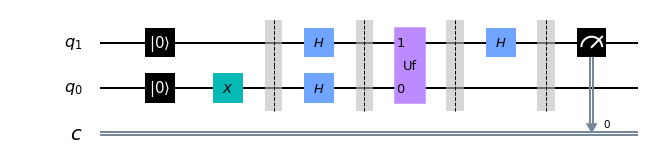

In [2]:
circ = QuantumCircuit(2, 1)
circ.reset([0, 1])
circ.x(0)
circ.barrier()
circ.h([0, 1])
circ.barrier()
circ.append(Gate(name="Uf", num_qubits=2, params=[]), [0, 1])
circ.barrier()
circ.h(1)
circ.barrier()
circ.measure(1, 0)
circ.draw('mpl', reverse_bits=True)

Here, the action of the 2-qubit unitary operator $U_f$ is given by

$$U_f|xy\rangle = |x\rangle \otimes |y \oplus f(x)\rangle$$

In the above circuit, we have marked out 4 barriers. We shall describe the circuit operation by evaluating the quantum state of the two qubits at these barriers, which we shall number 1-4 from left to right.

### Barrier 1
First, we initialize the state of the two qubits to the ground state. We then flip $q_0$. Thus, the state of the qubits at barrier 1 is

$$|\psi_1\rangle = |01\rangle$$

### Barrier 2
Next, we apply the Hadamard transform to both qubits. The state of the qubits is then

$$|\psi_2\rangle = H|0\rangle \otimes H|1\rangle = \left(\frac{|0\rangle + |1\rangle}{\sqrt{2}}\right) \otimes \left(\frac{|0\rangle - |1\rangle}{\sqrt{2}}\right) = \frac{1}{2} \left(|00\rangle - |01\rangle + |10\rangle - |11\rangle\right)$$

### Barrier 3
Now we do our one and only subroutine call. The action of the unitary operator $Uf$ is descibed above. The state of the qubits then become

$$\begin{align*}
|\psi_3\rangle &= \frac{1}{2} \left(|0\rangle \otimes |0 \oplus f(0)\rangle - |0\rangle \otimes |1 \oplus f(0)\rangle + |1\rangle \otimes |0 \oplus f(1)\rangle - |1\rangle \otimes |1 \oplus f(1)\rangle\right) \\
&= \frac{1}{2} \left(|0\rangle \otimes |f(0)\rangle - |0\rangle \otimes |\overline{f(0)}\rangle + |1\rangle \otimes |f(1)\rangle - |1\rangle \otimes |\overline{f(1)}\rangle\right)
\end{align*}$$

where an overbar has been used to represent the complement or NOT of a number. We're not done yet though. We'll simplify this further. To this end, we consider two cases, viz $f(0) = f(1)$ and $f(0) = \overline{f(1)}$. For the first case,

$$\begin{align*}
|\psi_3\rangle &= \frac{1}{2} \left(|0\rangle \otimes |f(0)\rangle - |0\rangle \otimes |\overline{f(0)}\rangle + |1\rangle \otimes |f(0)\rangle - |1\rangle \otimes |\overline{f(0)}\rangle\right) \\
&= \frac{1}{2} \left(\left(|0\rangle + |1\rangle\right) \otimes |f(0)\rangle - \left(|0\rangle + |1\rangle\right) \otimes |\overline{f(0)}\rangle\right) \\
&= H|0\rangle \otimes \frac{|f(0)\rangle - |\overline{f(0)}\rangle}{\sqrt{2}}
\end{align*}$$

In the second case, we get

$$\begin{align*}
|\psi_3\rangle &= \frac{1}{2} \left(|0\rangle \otimes |f(0)\rangle - |0\rangle \otimes |\overline{f(0)}\rangle + |1\rangle \otimes |\overline{f(0)}\rangle - |1\rangle \otimes |f(0)\rangle\right) \\
&= \frac{1}{2} \left(\left(|0\rangle - |1\rangle\right) \otimes |f(0)\rangle - \left(|0\rangle - |1\rangle\right) \otimes |\overline{f(0)}\rangle\right) \\
&= H|1\rangle \otimes \frac{|f(0)\rangle - |\overline{f(0)}\rangle}{\sqrt{2}}
\end{align*}$$

### Barrier 4
Finally, we apply a Hadamard Transform to $q_1$. Since $H^2 = I$, we get the final state as

$$|\psi_4\rangle = \begin{cases}
&|0\rangle \otimes \frac{|f(0)\rangle - |\overline{f(0)}\rangle}{\sqrt{2}}; \quad f(0) = f(1) \\
&|1\rangle \otimes \frac{|f(0)\rangle - |\overline{f(0)}\rangle}{\sqrt{2}}; \quad f(0) \neq f(1)
\end{cases}$$

Thus, we can simply measure out $q_1$ and extract out the value of $f(0) \oplus f(1)$. Notice that we used only a single subroutine call to achieve this. Also, note that the amount of information we get here is somewhat less than in the classical case. We have answered the question of whether $f(0) = f(1)$ or $f(0) \neq f(1)$ but we have not identified the exact function $f_i$. Nevertheless, we have achieved our objective (which was obviously tailored to favour quantum computers!).

## Qiskit Implementation
Before we simulate the circuit describe above, we will need to implement the operator $U_f$ for all possibilities of $f_i(x)$. This is done below.

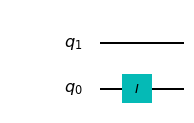

In [3]:
# Implementation of f1(x)
f1 = QuantumCircuit(2, name='f1')
f1.id(0)
f1.draw('mpl', reverse_bits=True)

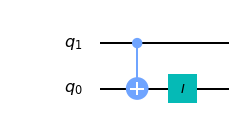

In [4]:
# Implementation of f2(x)
f2 = QuantumCircuit(2, name='f2')
f2.cx(1, 0)
f2.id(0)
f2.draw('mpl', reverse_bits=True)

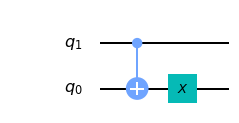

In [5]:
# Implementation of f3(x)
f3 = QuantumCircuit(2, name='f3')
f3.cx(1, 0)
f3.x(0)
f3.draw('mpl', reverse_bits=True)

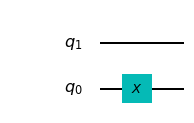

In [6]:
# Implementation of f4(x)
f4 = QuantumCircuit(2, name='f4')
f4.x(0)
f4.draw('mpl', reverse_bits=True)

The action of the above circuits are easily verified to be consistent with the action of the unitary operator $U_f$ as

$$U_f|xy\rangle = |x\rangle \otimes |y \oplus f(x)\rangle$$

## State Simulation
We shall now simulate the action of this circuit using qiskit. We shall first verify that the final state of the circuit is as calculated above. To do this, we use the state vector simulator.

### Equal Outputs
We first consider the case of $f(0) = f(1)$. We can use either $f_1(x)$ or $f_4(x)$ for this. We construct the circuit below. We expect the qubit $q_1$ to be in the ground state after the computation. We plot the state as a block multivector to show this. As expected, qubit $q_1$ is in state $|0\rangle$

In [7]:
circ = QuantumCircuit(2, 1)
circ.x(0)
circ.barrier()
circ.h([0, 1])
circ.append(f4.to_instruction(), [0, 1])
circ.h(1)
circ.draw(reverse_bits=True, plot_barriers=False)

┌───┐┌─────┐┌───┐
q_1: ──────┤ H ├┤1    ├┤ H ├
     ┌───┐ ├───┤│  f4 │└───┘
q_0: ┤ X ├─┤ H ├┤0    ├─────
     └───┘ └───┘└─────┘     
c_0: ═══════════════════════

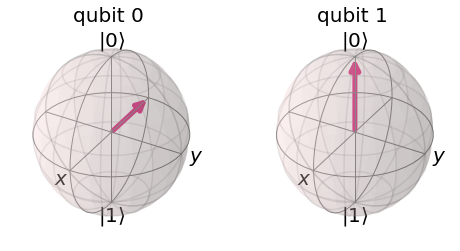

In [8]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
state = result.get_statevector(circ)
plot_bloch_multivector(state)

### Unequal Outputs
We now run the simulation for $f(0) \neq f(1)$. For this, we can replace $U_f$ by either of $f_2(x)$ or $f_3(x)$. This, time we expect the qubit $q_1$ to be in state $|1\rangle$. As the bloch multivector plot shows, this is exactly the case.

In [9]:
circ = QuantumCircuit(2, 1)
circ.x(0)
circ.barrier()
circ.h([0, 1])
circ.append(f2.to_instruction(), [0, 1])
circ.h(1)
circ.draw(reverse_bits=True, plot_barriers=False)

┌───┐┌─────┐┌───┐
q_1: ──────┤ H ├┤1    ├┤ H ├
     ┌───┐ ├───┤│  f2 │└───┘
q_0: ┤ X ├─┤ H ├┤0    ├─────
     └───┘ └───┘└─────┘     
c_0: ═══════════════════════

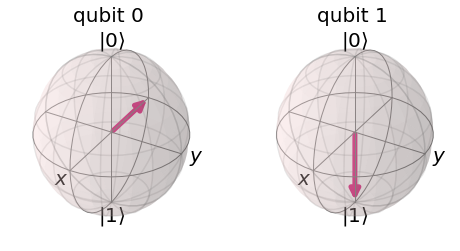

In [10]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
state = result.get_statevector(circ)
plot_bloch_multivector(state)

## QASM Simulation
We now perform an ideal simulation of the entire algorithm in the QASM simulator. We run the $f_3(x)$ circuit for 1000 shots. As expected, the measured outcome is always $1$ since $f_3(0) \neq f_3(1)$.

In [11]:
circ = QuantumCircuit(2, 1)
circ.x(0)
circ.barrier()
circ.h([0, 1])
circ.append(f2.to_instruction(), [0, 1])
circ.h(1)
circ.measure(1, 0)
circ.draw(reverse_bits=True, plot_barriers=False)

┌───┐┌─────┐┌───┐┌─┐
q_1: ──────┤ H ├┤1    ├┤ H ├┤M├
     ┌───┐ ├───┤│  f2 │└───┘└╥┘
q_0: ┤ X ├─┤ H ├┤0    ├──────╫─
     └───┘ └───┘└─────┘      ║ 
c_0: ════════════════════════╩═

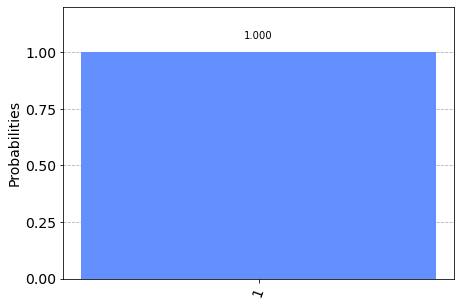

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ, simulator, shots=1000).result()
counts = result.get_counts(circ)
plot_histogram(counts)

## Remarks
Although the Deutsch algorithm does offer a speedup over classical algorithms, it is not too useful. The speedup is a paltry single subroutine call over two subroutine calls. However, it does illustrate as a first case, the possibility of quantum algorithms being more efficient than classical algorithms in certain problems. The problem solved by the Deutsch Algorithm is not particularly useful either. The speedup offered is much better in case of the Deutsch-Josza Algorithm, which is essentially a generalization of the Deutsch Algorithm to more than 2 qubits. A variant of the Deutsch-Josza Algorithm, the Bernstein-Vazirani Algorithm, solves a different problem with the same circuit, and is able to provide a numerical answer to the problem rather than a binary output.

## References
1. Quantum theory, the Church–Turing principle and the universal quantum computer. (1985). Proceedings of the Royal Society of London. A. Mathematical and Physical Sciences, 400(1818), 97-117. https://doi.org/10.1098/rspa.1985.0070
2. Rapid solution of problems by quantum computation. (1992). Proceedings of the Royal Society of London. Series A: Mathematical and Physical Sciences, 439(1907), 553-558. https://doi.org/10.1098/rspa.1992.0167
3. Mermin, N. D. (2007). Quantum computer science: An introduction. Cambridge University Press.
4. Nielsen, M. A., & Chuang, I. L. (2010). Quantum computation and quantum information: 10th anniversary edition. Cambridge University Press.
5. Qiskit documentation — Qiskit 0.19.3 documentation. (n.d.). Qiskit. https://qiskit.org/documentation/